This notebook processes data. It loads WAV files and computes its corresponding spectrogram, and loads MIDI files.

Many hyperparameters are chosen based on: https://arxiv.org/pdf/1710.11153.pdf (Onsets and Frames)

In [1]:
# Load libraries

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pretty_midi

In [7]:
# User parameters

wav_path = 'Menuett_G_dur_BWV.Anh.114.wav'
midi_path = 'Menuett_G_dur_BWV.Anh.114.mid'
sampling_rate = 16000 # 22050 is default, 16000 is to match the paper; sampling rate for WAV files
sampling_frequency = 100 # 100 is default (pretty midi); sampling rate for MIDI files
num_freq_bins = 229
partition_size = 20 # number of seconds each partition of the song should be

### Processing WAV Files

In [3]:
# Load in WAV file

audio, _ = librosa.core.load(wav_path, sr=sampling_rate)

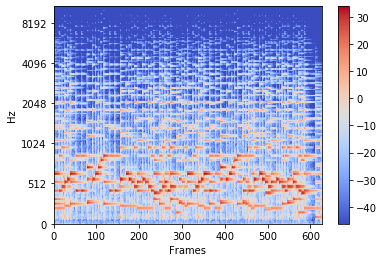

In [4]:
# Compute spectrogram on first partition of the song

audio_start = 0
audio_end = partition_size*sampling_rate
mel_spec = librosa.feature.melspectrogram(y=audio[audio_start:audio_end], sr=sampling_rate, 
                                          n_mels=num_freq_bins)
log_mel_spec = librosa.power_to_db(mel_spec) # compute the log of the amplitudes
librosa.display.specshow(log_mel_spec, x_axis='frames', y_axis='mel')
plt.colorbar()

In [5]:
# Dimensions of spectrogram

print(log_mel_spec.shape)

(229, 626)


In [5]:
# Save spectrogram

with open(wav_path[:-3] + 'npy', 'wb') as np_file:
    np.save(np_file, log_mel_spec)

The saved spectrogram will be used as input to the network.

### Processing MIDI Files

A useful tutorial page for Pretty MIDI: https://notebook.community/craffel/pretty-midi/Tutorial

In [6]:
# Load in MIDI file

midi = pretty_midi.PrettyMIDI(midi_path)

C:\Users\antho\Miniconda3\envs\py37\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


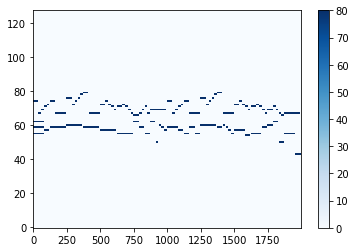

In [8]:
# Get piano roll for first partition of the song

piano_notes = midi.get_piano_roll()
midi_start = 0
midi_end = partition_size*sampling_frequency
piano_partition = piano_notes[:, midi_start:midi_end]
plt.imshow(piano_partition, cmap="Blues", aspect="auto", origin=[128,0]) # auto makes each box rectangular, origin puts 128th row on top
plt.colorbar()
plt.show()

In [10]:
# Shape of piano roll

print(piano_partition.shape)

(128, 2000)


Please ignore everything below this.

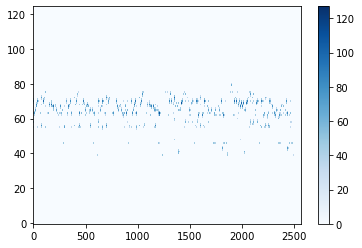

In [63]:
import numpy as np
from reverse_pianoroll import *
C = np.abs(librosa.cqt(audio, sr=sample_rate))
piano_roll = cqt_to_piano_roll(C, 21, 108, 32)
plt.imshow(piano_roll, cmap="Blues", aspect="auto", origin=[128,0]) # auto makes each box rectangular, origin puts 128th row on top
plt.colorbar()
plt.show()